In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

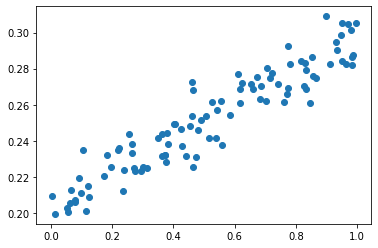

In [6]:
#均匀分布的随机样本值
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + noise

plt.scatter(x_data,y_data)
plt.show()

In [10]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [11]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [12]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1,1)
        
    # 定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [14]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [15]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc.weight, param:Parameter containing:
tensor([[0.1452]], requires_grad=True)
name:fc.bias, param:Parameter containing:
tensor([-0.2391], requires_grad=True)


In [16]:
for i in range(1001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 0.17312511801719666
200 0.00011642437311820686
400 9.349398169433698e-05
600 9.337619849247858e-05
800 9.337558731203899e-05
1000 9.33755945879966e-05


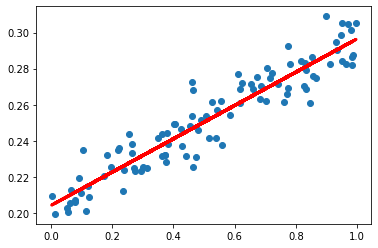

In [17]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()